In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objective

I've made the claim that for many of my data subsets, there's a negative association btwn more Hispanics in an area and completion time. Since I didn't check the linear regression assumptions, does my claim hold water?

I can back it up by EDA checking the correlation btwn that X and y.

In [14]:
CATEGORY_GROUPS_IN_QUESTION = [
    ['Pick up Dead Animal', 'Animal Generic Request'],
    ['Abandoned Vehicles', 'Abandoned Bicycle'],
    ['Rodent Activity',	'Bed Bugs', 'Mice Infestation - Residential'],
    ['Unsatisfactory Living Conditions', 'Poor Conditions of Property', 'Unsanitary Conditions - Establishment', 'Illegal Occupancy', 'Heat - Excessive  Insufficient'],
    ['Graffiti Removal']
]

In [11]:
from __future__ import division
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
from tqdm import tqdm

from utilities import remove_one_feature

warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set_style("whitegrid")
sns.set_context("poster")
rcParams['figure.figsize'] = 20, 10

import os, sys
sys.path.append(os.path.join(os.path.dirname('.'), "../preprocessing"))
from helper_functions import dummify_cols_and_baselines, make_alphas, remove_outliers_by_type, adjusted_r2, transform_school, get_vifs

In [4]:
df_orig = pd.read_pickle('../data/data_from_remove_from_dataset.pkl')
df_orig.shape

(516406, 40)

## Removing outliers

A standard procedure is to remove values further than 3 standard deviations from the mean. Since I have so many low values and some very high values, I anecdotally think that the low values are very likely to be true, and the high values not so much.

So, I will remove values further than 3 SDs from the median, by type.

Ideally, I would take into account the time dimension. I would like to do so given more time.

In [5]:
df_outliers_removed = remove_outliers_by_type(df_orig, y_col='COMPLETION_HOURS_LOG_10')
df_outliers_removed.shape

../preprocessing/helper_functions.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  group[pd.np.abs(group - group.median()) > stds * group.std()] = pd.np.nan
/Users/datascientist/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


(508653, 40)

## I only care about 3 columns

In [6]:
df = df_outliers_removed[['COMPLETION_HOURS_LOG_10', 'TYPE', 'race_hispanic']]
df.shape

(508653, 3)

## Running correlations

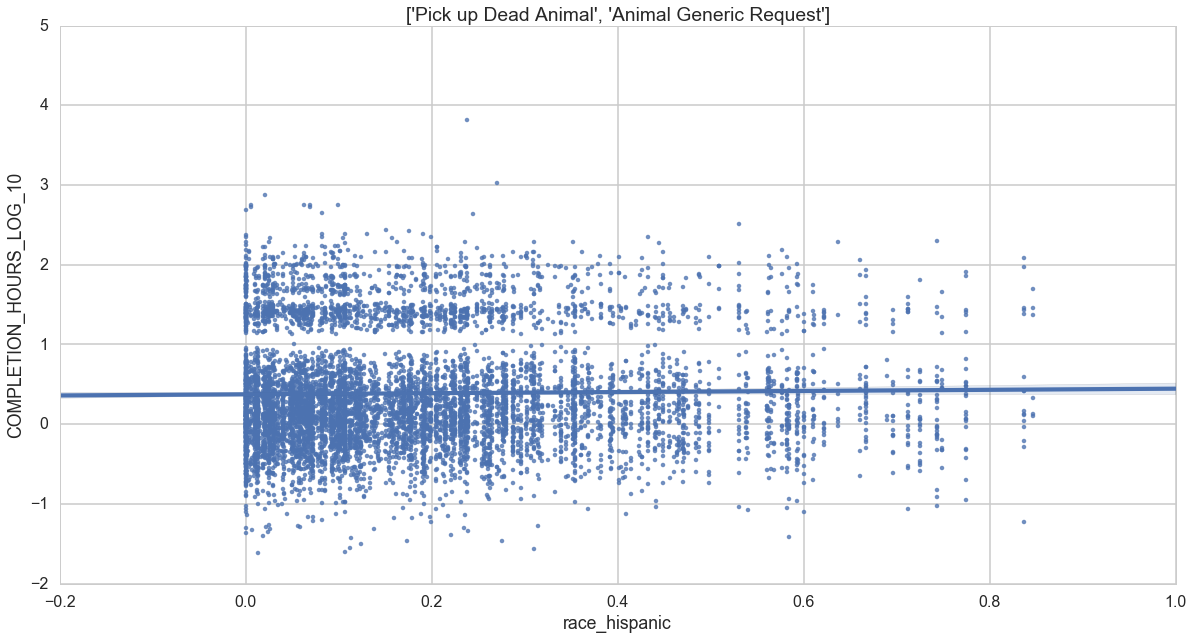

In [15]:
i = 0
ax = sns.regplot(x='race_hispanic', y='COMPLETION_HOURS_LOG_10', data=df[df.TYPE.isin(CATEGORY_GROUPS_IN_QUESTION[i])])
ax.set_title(str(CATEGORY_GROUPS_IN_QUESTION[i]));

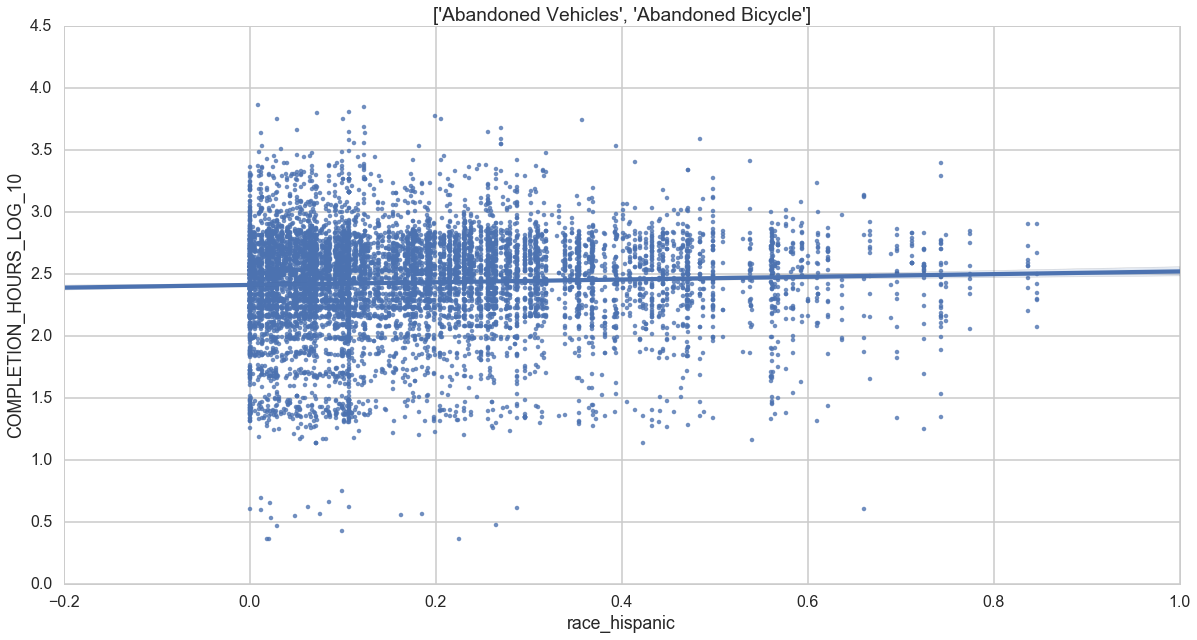

In [16]:
i = 1
ax = sns.regplot(x='race_hispanic', y='COMPLETION_HOURS_LOG_10', data=df[df.TYPE.isin(CATEGORY_GROUPS_IN_QUESTION[i])])
ax.set_title(str(CATEGORY_GROUPS_IN_QUESTION[i]));

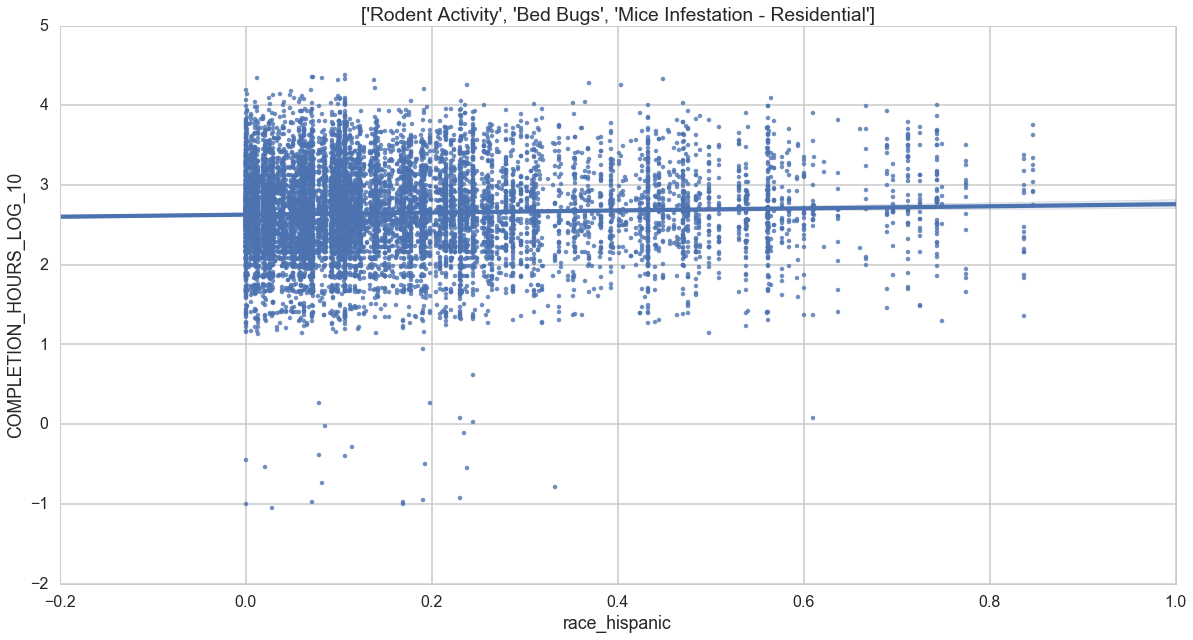

In [17]:
i = 2
ax = sns.regplot(x='race_hispanic', y='COMPLETION_HOURS_LOG_10', data=df[df.TYPE.isin(CATEGORY_GROUPS_IN_QUESTION[i])])
ax.set_title(str(CATEGORY_GROUPS_IN_QUESTION[i]));

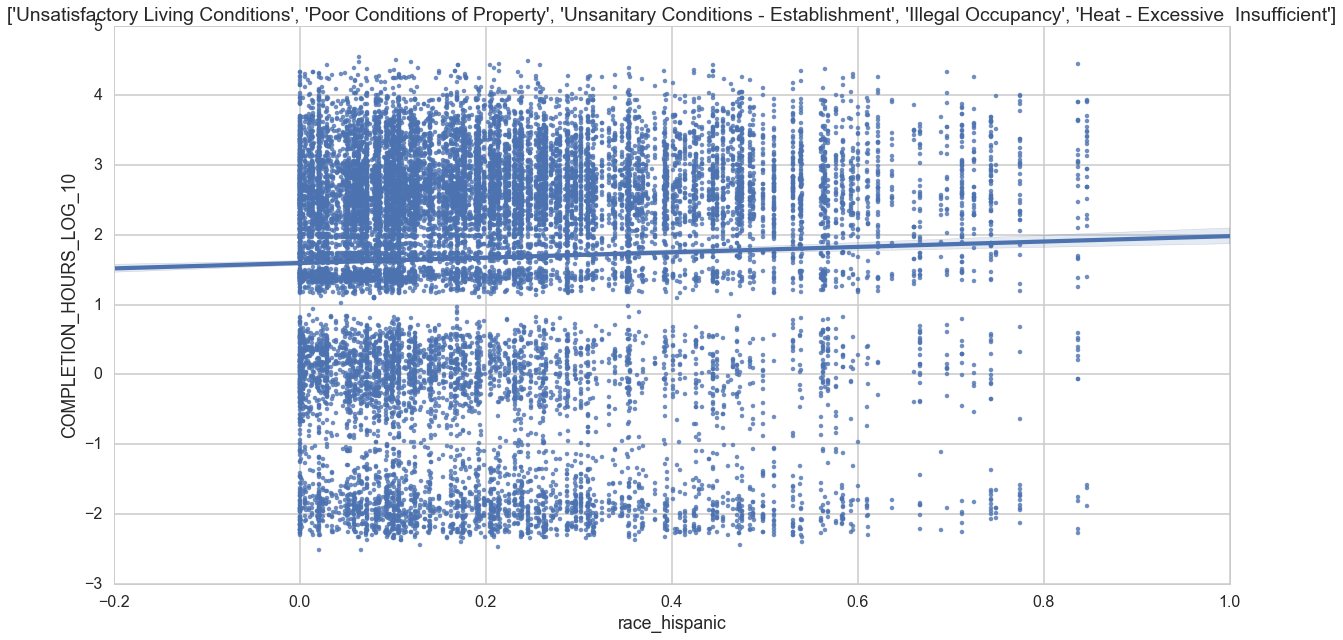

In [18]:
i = 3
ax = sns.regplot(x='race_hispanic', y='COMPLETION_HOURS_LOG_10', data=df[df.TYPE.isin(CATEGORY_GROUPS_IN_QUESTION[i])])
ax.set_title(str(CATEGORY_GROUPS_IN_QUESTION[i]));

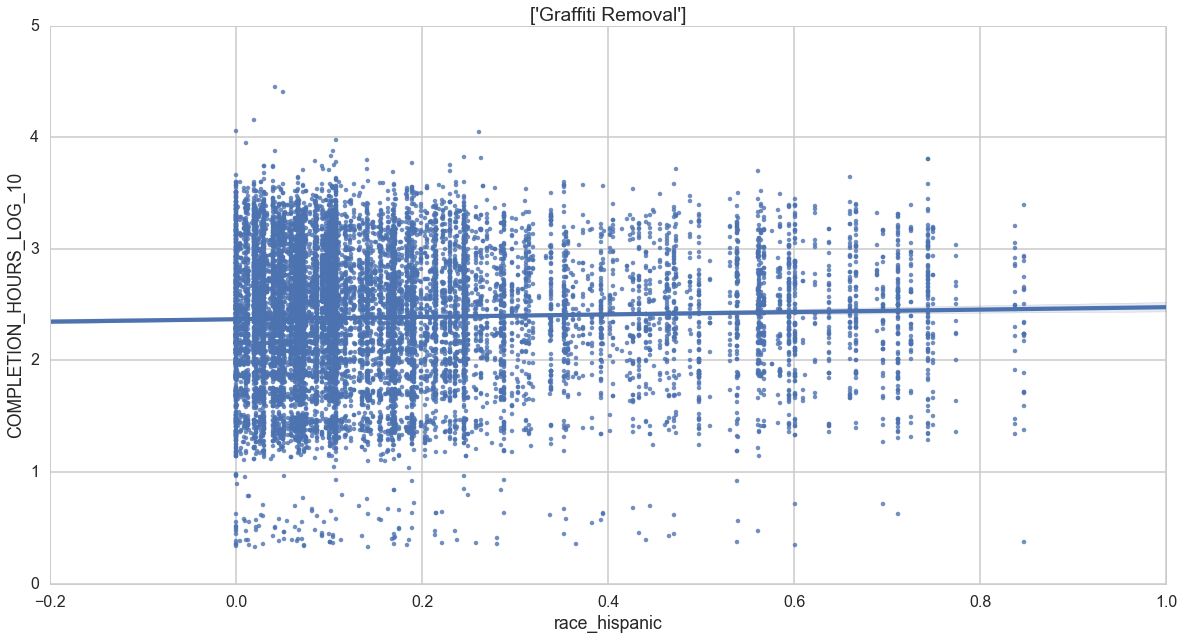

In [19]:
i = 4
ax = sns.regplot(x='race_hispanic', y='COMPLETION_HOURS_LOG_10', data=df[df.TYPE.isin(CATEGORY_GROUPS_IN_QUESTION[i])])
ax.set_title(str(CATEGORY_GROUPS_IN_QUESTION[i]));

## Conclusion

We do indeed see a negative correlation between proportion of Hispanics and completion time, bolstering our claims of the association put forth by the model.